# Lucas Peterson, Worked with Nick O'Brien and Eric Tunissen

# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

ImportError: cannot import name 'GMM'

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

# Problem 2

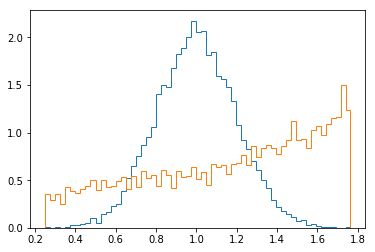

In [2]:
np.random.seed(0)

N = 10000
mu = 1.
sigma = 0.2

data = np.random.normal(loc=mu,scale=sigma,size=N)
q25,q75 = np.percentile(data,[25,75])
sigmaG = 0.7413 * (q75-q25)

binSize = (2.7*sigmaG)/(N**(1./3))
bins = np.append(np.arange(start=np.min(np.sort(data)),stop=np.max(np.sort(data)),step=binSize),np.max(np.sort(data)))

true = norm(mu,sigma).pdf(data)

plt.hist(data,bins=bins,histtype = 'step',density = True)
plt.hist(true,bins=bins,histtype = 'step',density = True)
print()

# Problem 3

Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with np.concatenate()) 
another sample of 10,000 data values drawn from a cauchy distribution with  𝜇=2.0  and  𝛾=0.5 . 
Do it twice: once with the bin size determined using the Freedman-Diaconis rule and once using the Scott's rule. Comment.

0.07174341140088565
0.09300071848262956


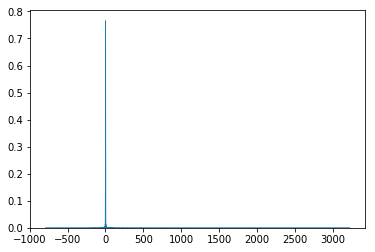

In [4]:
mewTwo=2.0
gamma=0.5

distC = cauchy(mewTwo,gamma)
dataC = distC.rvs(N)
NewData = np.concatenate((data,dataC))
N = N * 2

q25,q75 = np.percentile(NewData,[25,75])
sigmaG = 0.7413 * (q75-q25)
#Freedman-Diaconis
binSizeFD = (2.7*sigmaG)/(N**(1./3))
binsFD = np.append(np.arange(start=np.min(np.sort(NewData)),stop=np.max(np.sort(NewData)),step=binSizeFD),np.max(np.sort(NewData)))
#Scott's Rule
binSizeS = (3.5*sigmaG)/(N**(1./3))
binsS = np.append(np.arange(start=np.min(np.sort(NewData)),stop=np.max(np.sort(NewData)),step=binSizeS),np.max(np.sort(NewData)))

true = cauchy(mewTwo,gamma).pdf(NewData)

plt.hist(NewData,bins=binsFD,histtype = 'step',density = True)
#plt.hist(NewData,bins=binsS,histtype = 'step',density = True)
#plt.hist(true,bins=binsFD,histtype = 'step',density = True)
#plt.hist(true,bins=binsS,histtype = 'step',density = True)
print (binSizeFD)
print (binSizeS)


# Problem 4

Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 
𝒩(0,1)  draws of  𝜒2  for N=2 and N=5. Overplot the theoretical pdf (it will help to use scipy.special.gamma()).

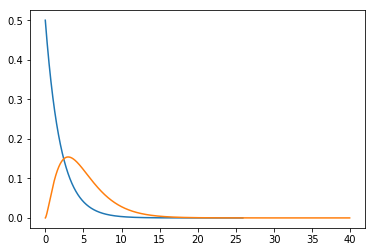

In [10]:
from scipy.stats import chi2

N = 1000000
dist2 = chi2(2)
dist5 = chi2(5)

data2 = dist2.rvs(N)
data5 = dist5.rvs(N)

plt.plot(np.sort(data2),dist2.pdf(np.sort(data2)))
plt.plot(np.sort(data5),dist5.pdf(np.sort(data5)))